# Proyecto 1
## Fernando Rodriguez - 202030542 - 3696417440901

In [1]:
import pandas as pd
import os
from utils.downloader import download_csv_from_url
from utils.stats import *
from source.database import obtener_datos, obtener_datos_no_loc

Se importa la data

In [2]:
dfData = obtener_datos()
dfDataNoLoc = obtener_datos_no_loc()
dfData = calcular_cumulativo(dfData, 'fallecidos', 'fallecidos_acumulado')
dfData = calcular_cumulativo(dfData, 'casos', 'casos_acumulado')
dfDataNoLoc = calcular_cumulativo(dfDataNoLoc, 'fallecidos', 'fallecidos_acumulado')
#Transformacion para tener poblacion y fallecidos en un mismo dataframe
dfDataMerge = pd.merge(dfData, dfDataNoLoc, on=['fecha'], how='inner')
dfDataMerge = dfDataMerge[['fecha', 'fallecidos_y', 'poblacion', 'nombre_municipio', 'nombre_departamento', 'fallecidos_acumulado_y']]
dfDataMerge.rename(columns={'fallecidos_y' : 'fallecidos', 'fallecidos_acumulado_y' : 'fallecidos_acumulado'}, inplace=True)

Datos extraídos correctamente.
Datos extraídos correctamente.


### EDA Monovariable

#### Descripcion General

In [3]:
descripcion_general(dfData)

               casos  fallecidos     poblacion
count  341712.000000    341712.0  3.417120e+05
mean        0.059298         0.0  4.997885e+04
std         0.484959         0.0  8.122351e+04
min         0.000000         0.0  2.563000e+03
25%         0.000000         0.0  1.746500e+04
50%         0.000000         0.0  3.097300e+04
75%         0.000000         0.0  5.949600e+04
max        33.000000         0.0  1.205668e+06


A partir de la descripcion general se puede obtener que la media de poblacion sd encuentra en los decimales, lo que significa que hay varios casos con 0 dentro de los registros.

#### Histogramas

##### Casos

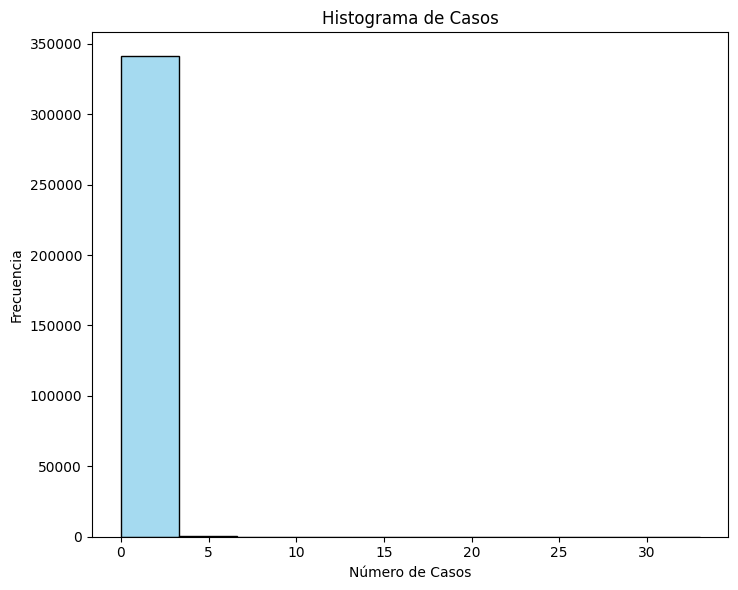

In [4]:
graficar_histograma(dfData, 'casos')

El histograma de casos indica que la mayoria de fechas presenta pocos casos, menos de 5, siendo que una cantidad grande de casos por fecha no es posible.

##### Fallecidos

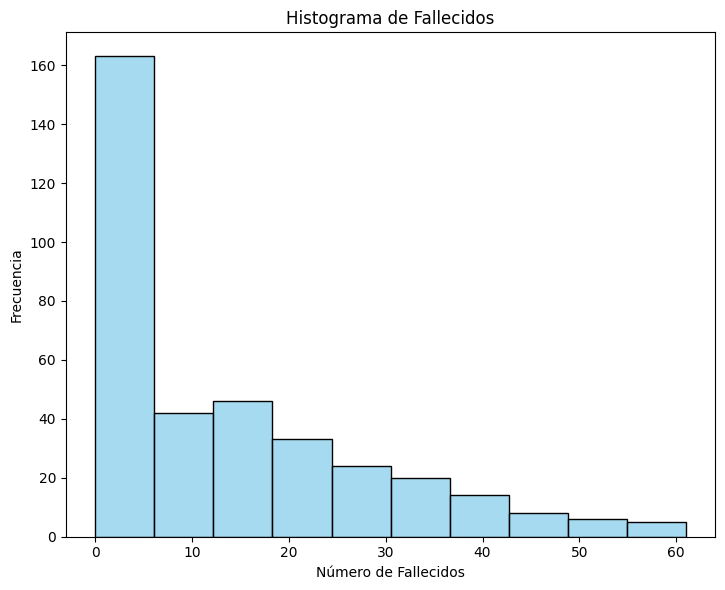

In [5]:
graficar_histograma(dfDataNoLoc, 'fallecidos')

El hisograma de fallecidos indica que la cantidad de fallecidos en fechas especificas se mantiene reducida, siendo raro que haya fechas individuales con muchas muertes, esto ya que la frecuencia de registros con muchos fallecidos es muy poca.

##### Fallecidos Acumulado

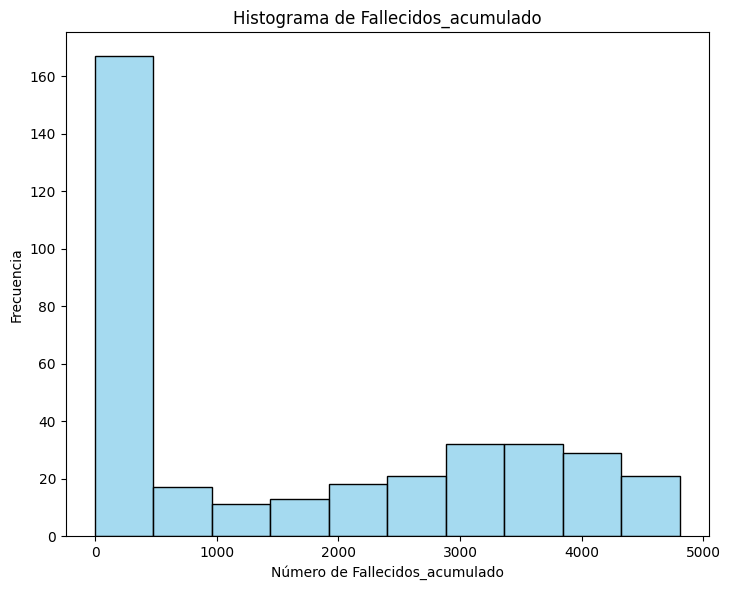

In [6]:
graficar_histograma(dfDataNoLoc, 'fallecidos_acumulado')

El histograma indica que la cantidad de fallecidos acumulado es reducida, siendo que no se acumulan demasiados fallecidos, aunque hay un repunte entre los 3000 y 4000 producto de varios casos que se acumulan a lo largo del tiempo.

##### Poblacion

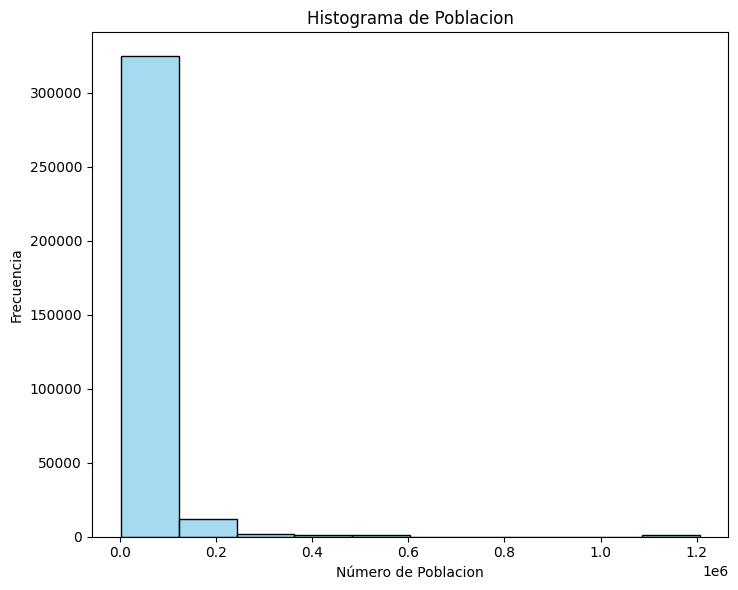

In [7]:
graficar_histograma(dfData, 'poblacion')

El histograma de poblacion indica que en Guatemala hay muchos municipios con poca poblacion, siendo muy raros los municipios con bastante poblacion, representados por las dos ultimas barras.

#### Boxplots, Rango Intercuatilico y Outliers

#### Casos

Columna: casos
Q1: 3.0, Q3: 682.0
IQR: 679.0
Límite Inferior: -1015.5, Límite Superior: 1700.5

Outliers encontrados en 'casos': 1 registros



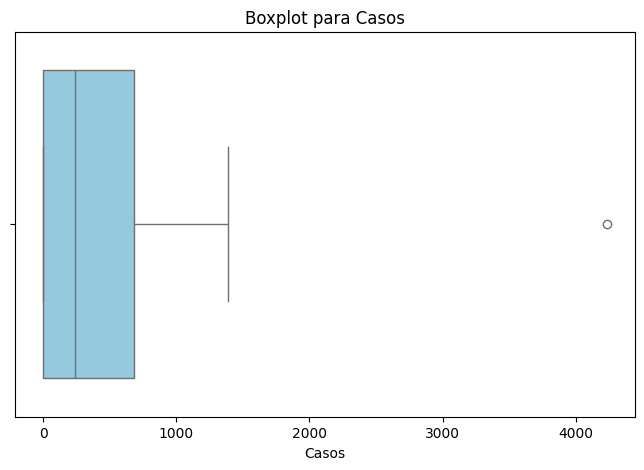

In [8]:
rango_intercuartilico(dfDataNoLoc, 'casos')

El boxplot de los casos indica que los rangos entre las cantidades de los casos que se han encontrado son pequenas, siendo que la mayoria de casos se encuentran en los 3, y llegan hasta los 682 en el peor de los casos, siendo bastante reducido.
Asi como se encontro un outlier de un registro que indica mas de 4000 casos, esto puede deberse a una fecha con muchos casos en el municipio de Guatemala, y no vale la pena quitarlo, al ser solo uno el caso, puede ser importante para su posterior estudio.

#### Fallecidos

Columna: fallecidos
Q1: 0.0, Q3: 22.0
IQR: 22.0
Límite Inferior: -33.0, Límite Superior: 55.0

Outliers encontrados en 'fallecidos': 5 registros



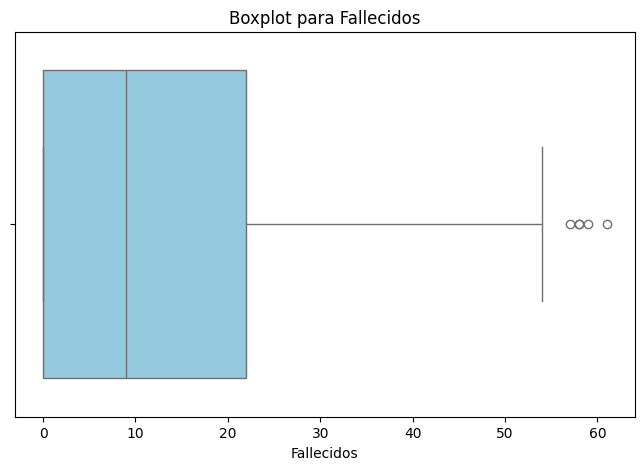

In [9]:
rango_intercuartilico(dfDataNoLoc, 'fallecidos')

El boxplot de los fallecidos indica que hay muchas instancias en donde no se registraron casos, siendo el primer cuartil de 0, y donde en el peor de los casos hubo 22, por lo que la cantidad de fallecidos se mantuvo reltaivamente controlada.
Asi como tambien cabe mencionar que la cantidad de outliers encontradas es poca, siendo solo de 5, estos pueden corresponder a fechas con muchos fallecidos en municipios altamente poblados, amerita ser guardado por ser tan pocos caoss y no desviar el calculo final.

#### Fallecidos Acumulado

Columna: fallecidos_acumulado
Q1: 1.0, Q3: 3263.0
IQR: 3262.0
Límite Inferior: -4892.0, Límite Superior: 8156.0

Outliers encontrados en 'fallecidos_acumulado': 0 registros



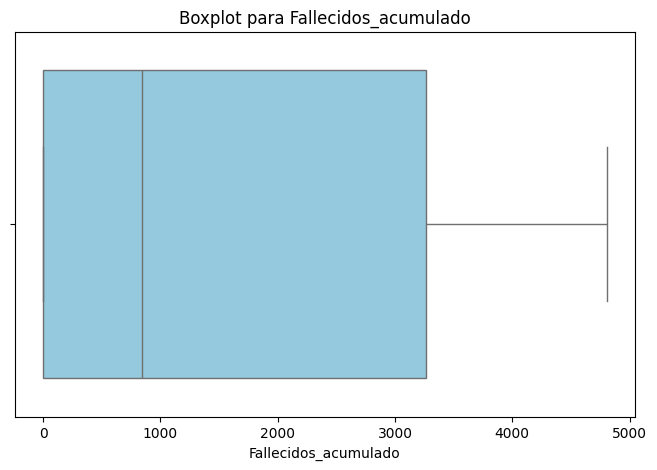

In [10]:
rango_intercuartilico(dfDataNoLoc, 'fallecidos_acumulado')

El boxplot de los fallecidos acumulados indica una amplia variabilidad en la forma en que los fallecidos se acumularon, siendo que el menor de los casos solo se acumulo 1, y en el peor de los casos 3263, esta alta variabilidad indica que los fallecidos fueron distribuidos con relativo orden a lo largo del tiempo, asi como puede indicar que los outliers de los fallecidos se acumularon en una fecha concreta para dar esa gran fecha.
No se encontrarlon outliers.

#### Poblacion

Columna: poblacion
Q1: 17465.0, Q3: 59496.0
IQR: 42031.0
Límite Inferior: -45581.5, Límite Superior: 122542.5

Outliers encontrados en 'poblacion': 17136 registros



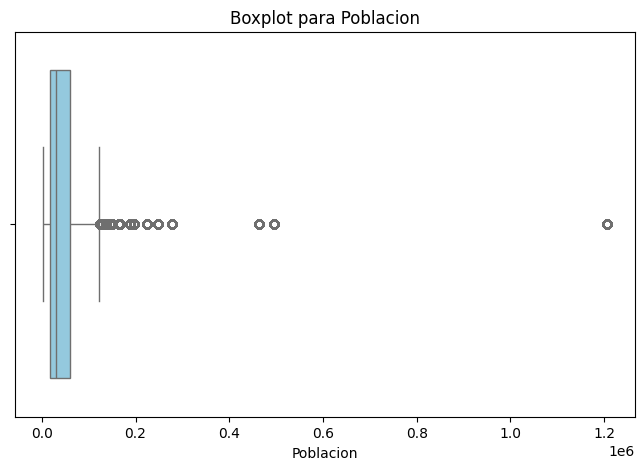

In [11]:
rango_intercuartilico(dfData, 'poblacion')

El boxplot de la poblacion es particular, ya que se encuentra que la poblacion del pais no tiene realmente una distribucion demaciado pareja, siendo que se encontraron muchisimos outlies, lo que indica la presencia de una enorme cantidad de municipios con una poblacion reducida y un gran puñado de municipios con una poblacion en aumento, no se quitaron todos estos outlier ya que representan esa gran variedad de poblaciones.

##### Categoricos

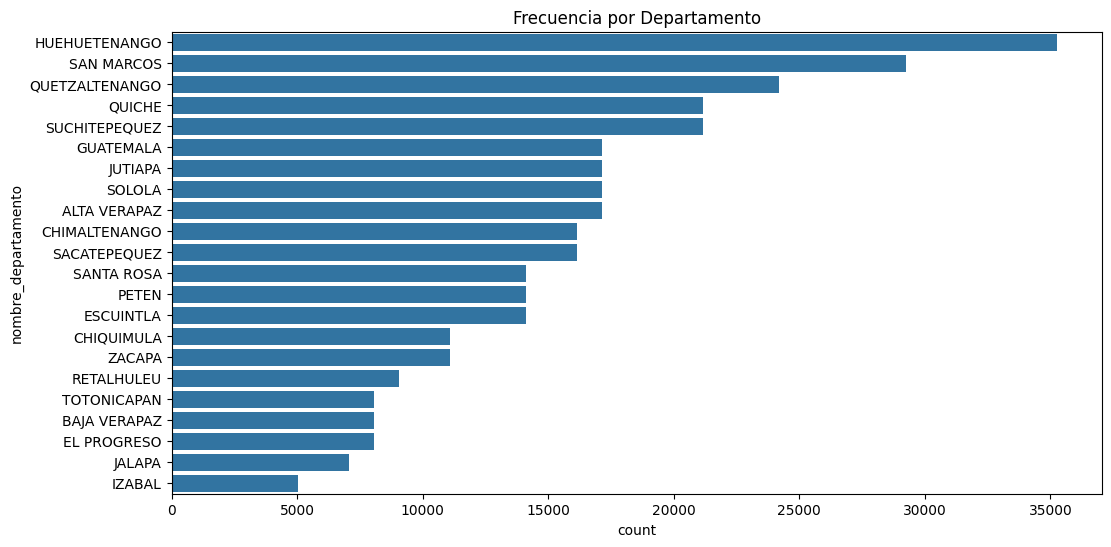

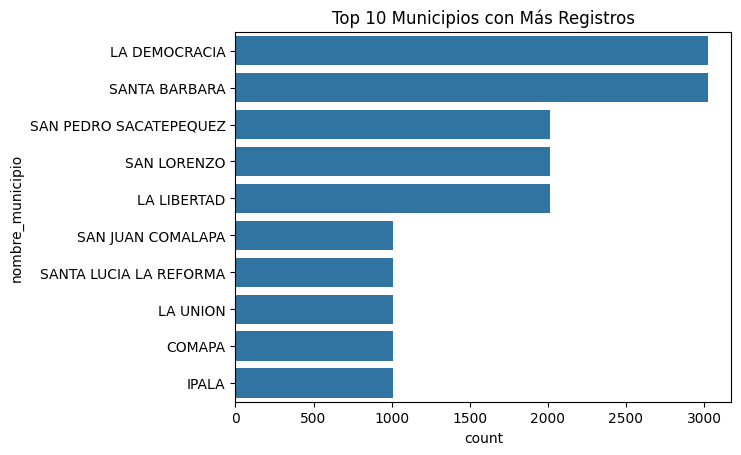

In [12]:
graficar_categoricos(dfData)

Las graficas categoricas indican algunos datos interesantes de mencionar, siendo que Huehuetenango es el departamento con mas apariciones de casos, siendo tambien el departamento mas poblado, seguido de San Marcos, Quetzaltenango y Quiche, departamentos muy poblados con un acceso cuestionable a medios de sanidad.

Asi como el segundo puede indicar que los municipios con mas registros son los pertenecientes a estos departamentos, incluyendo la Democracia y Santa Barbara.

Graficas de Dispersion


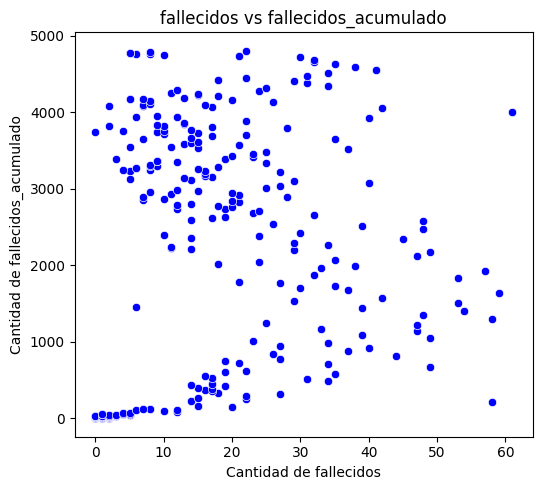

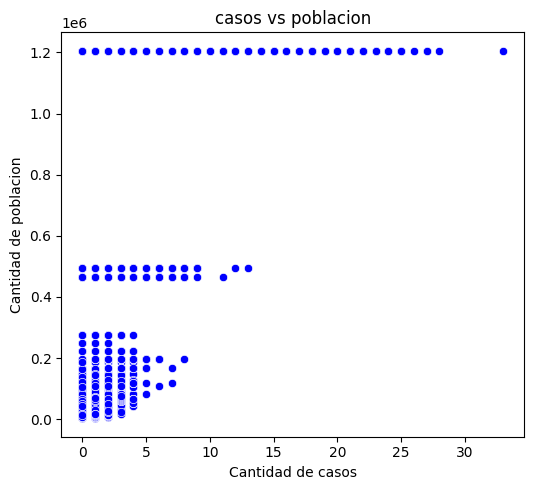

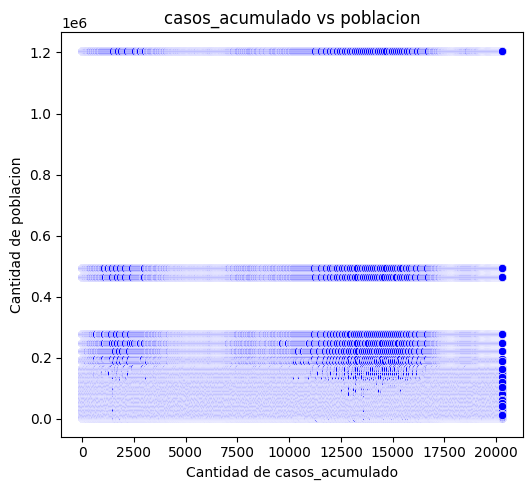

Graficas Comparativas


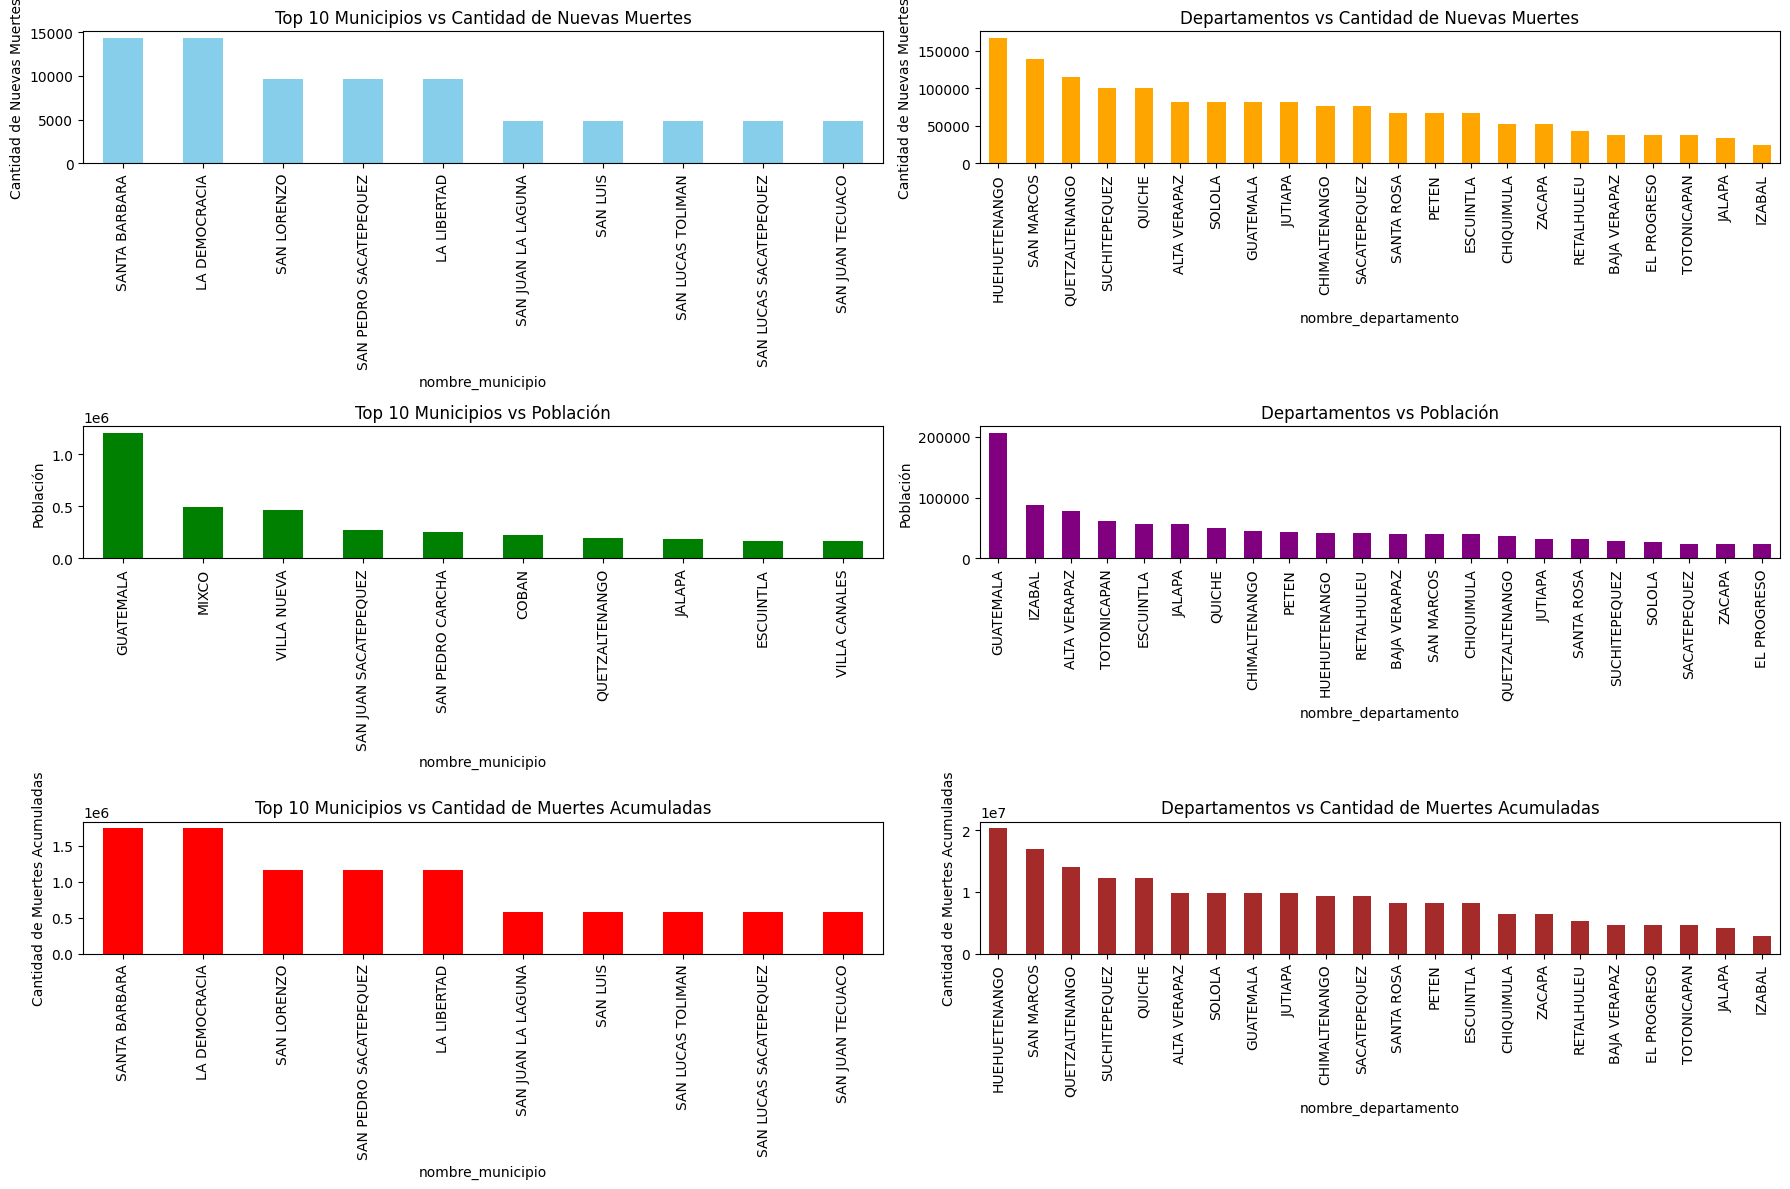

### Matriz de Correlación de Pearson ###
                         casos  fallecidos  fallecidos_acumulado
casos                 1.000000    0.654566              0.461791
fallecidos            0.654566    1.000000              0.428420
fallecidos_acumulado  0.461791    0.428420              1.000000

### Matriz de Correlación de Spearman ###
                         casos  fallecidos  fallecidos_acumulado
casos                 1.000000    0.855383              0.722759
fallecidos            0.855383    1.000000              0.697617
fallecidos_acumulado  0.722759    0.697617              1.000000


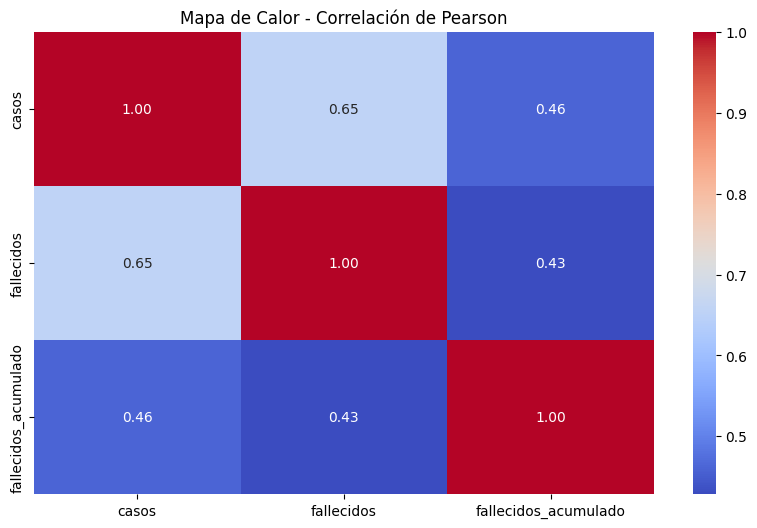

In [13]:
eda_multivariable(dfData, dfDataNoLoc, dfDataMerge)